In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio as rio
# Custom modules provided by earthdatascience.org
import earthpy as et
import earthpy.plot as ep

# Get data and set working directory
# et.data.get_data("datasets/colorado-flood")
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

# Create a path to file
lidar_dsm_path = os.path.join("datasets\colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DSM.tif")
lidar_dtm_path = os.path.join("datasets\colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")
lidar_dsm_path
lidar_dtm_path

'datasets\\colorado-flood\\spatial\\boulder-leehill-rd\\pre-flood\\lidar\\pre_DTM.tif'

In [2]:
# DSM
with rio.open(lidar_dsm_path) as lidar_dsm:
    lidar_dsm_im = lidar_dsm.read(1, masked=True)
lidar_dsm_im
# DTM
with rio.open(lidar_dtm_path) as src:
    lidar_dtm = src.read(1, masked=True)
lidar_dtm

masked_array(
  data=[[--, --, --, ..., 1695.6300048828125, 1695.419921875,
         1695.429931640625],
        [--, --, --, ..., 1695.5999755859375, 1695.5399169921875,
         1695.3599853515625],
        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,
         1695.3699951171875],
        ...,
        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],
        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,
         1681.5599365234375],
        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,
         1681.739990234375]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.4028235e+38,
  dtype=float32)

<class 'numpy.ma.core.MaskedArray'>
1676.21 2087.43


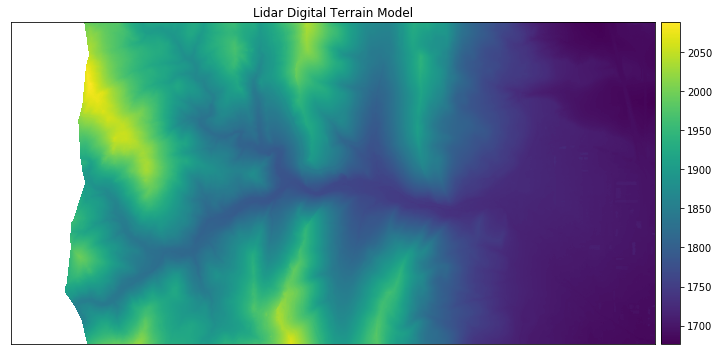

In [11]:
print(type(lidar_dtm))
print(lidar_dtm.min(), lidar_dtm.max())
lidar_dtm.shape
ep.plot_bands(lidar_dtm,
              scale=False,
              cmap='viridis',
              title="Lidar Digital Terrain Model")
plt.show()

## Raster Arithmetic

See: "Digital Elevation Models" <br>

DEMs are used to measure elevation of objects of interest. <br>
This dataset gives us DEMs in form of surface & terrain models. <br>
We can use these to determine the true height of objects (height model) by using: <br>
`height = surface - elevation` <br>
This is an example of raster substraction. <br>

In [6]:
# Check that the images cover the same geographic area
# and have the same spatial resolution
# Are the bounds the same?
print("Is the spatial extent the same?", 
      lidar_dsm.bounds == lidar_dtm.bounds)

# Is the resolution the same ??
print("Is the resolution the same?", 
      lidar_dsm.res == lidar_dtm.res)


AttributeError: 'MaskedArray' object has no attribute 'res'

In [2]:
lidar_chm = lidar_dsm - lidar_dtm
# Dataplot
ep.plot_bands(lidar_chm,
              cmap='viridis',
              title="Lidar Canopy Height Model (CHM)",
              scale=False)
plt.show()
# Histogram
ep.hist(lidar_chm, 
        colors = 'purple',
        title="Histogram of CHM Values")
plt.show()

NameError: name 'lidar_dsm' is not defined